In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle


In [46]:
!pip install imbalanced-learn

In [39]:
df=pd.read_csv("/content/drive/MyDrive/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv")

In [40]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [41]:
le=LabelEncoder()
df["race"]=le.fit_transform(df["race"])

In [42]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,3,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,3,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,3,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,3,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,1,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,3,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,3,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [43]:
encoder = LabelEncoder()
df_encoded = df.apply(lambda col: encoder.fit_transform(col) if col.dtype == 'object' else col)


In [44]:
df_encoded

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,3,0,0,1,6,25,1,1,...,0,1,1,0,0,0,0,1,0,2
1,149190,55629189,3,0,1,1,1,1,7,3,...,0,3,1,0,0,0,0,0,1,1
2,64410,86047875,1,0,2,1,1,1,7,2,...,0,1,1,0,0,0,0,1,1,2
3,500364,82442376,3,1,3,1,1,1,7,2,...,0,3,1,0,0,0,0,0,1,2
4,16680,42519267,3,1,4,1,1,1,7,1,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,1,7,1,1,3,7,3,...,0,0,1,0,0,0,0,0,1,1
101762,443847782,74694222,1,0,8,1,1,4,5,5,...,0,2,1,0,0,0,0,1,1,2
101763,443854148,41088789,3,1,7,1,1,1,7,1,...,0,0,1,0,0,0,0,0,1,2
101764,443857166,31693671,3,0,8,1,2,3,7,10,...,0,3,1,0,0,0,0,0,1,2


<Axes: >

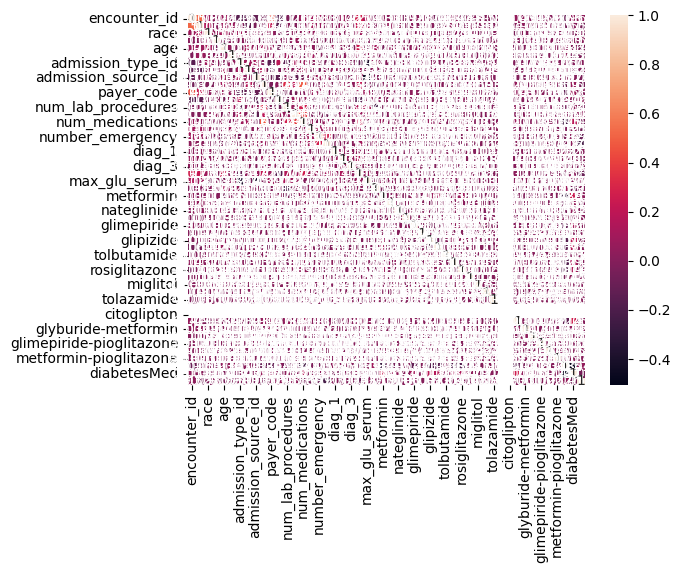

In [45]:
sns.heatmap(df_encoded.corr(),annot=True)

In [46]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,1.000000,0.512028,0.082291,0.006025,0.071716,-0.019152,-0.158961,-0.132876,-0.112402,-0.062221,...,NaN,0.049437,0.033990,0.000592,0.002089,0.006630,0.007285,-0.096372,0.051817,0.031806
patient_nbr,0.512028,1.000000,0.151442,0.006694,0.070991,0.071666,-0.011128,-0.136814,-0.032568,-0.024092,...,NaN,-0.000024,0.029254,-0.003550,-0.001050,0.009475,-0.001052,-0.054842,0.017232,-0.057623
race,0.082291,0.151442,1.000000,0.055271,0.114684,0.040260,0.098659,0.005994,0.031173,-0.015324,...,NaN,-0.029865,0.006656,0.004833,0.001340,-0.012277,0.001340,-0.009325,-0.006367,-0.015184
gender,0.006025,0.006694,0.055271,1.000000,-0.050535,0.000556,0.014592,-0.020847,-0.003843,-0.029928,...,NaN,0.003435,0.004054,0.006954,-0.002907,0.004779,-0.002907,-0.014905,0.015901,0.014533
age,0.071716,0.070991,0.114684,-0.050535,1.000000,0.023498,-0.007209,0.114323,0.044696,0.107515,...,NaN,-0.023173,-0.001306,0.002042,-0.000190,0.002512,-0.000190,0.036019,-0.022601,-0.030271
weight,-0.019152,0.071666,0.040260,0.000556,0.023498,1.000000,0.041933,-0.030329,0.016641,0.026029,...,NaN,-0.027779,-0.013632,-0.001886,-0.000523,-0.000740,-0.000523,0.045327,-0.033641,-0.030586
admission_type_id,-0.158961,-0.011128,0.098659,0.014592,-0.007209,0.041933,1.000000,0.083483,0.106654,-0.012500,...,NaN,-0.007858,-0.002485,-0.004399,-0.002221,-0.000074,0.002117,-0.007274,-0.000310,0.008950
discharge_disposition_id,-0.132876,-0.136814,0.005994,-0.020847,0.114323,-0.030329,0.083483,1.000000,0.018193,0.162748,...,NaN,-0.022845,-0.004352,0.000444,-0.001612,-0.000181,-0.000425,0.012307,-0.028887,-0.012450
admission_source_id,-0.112402,-0.032568,0.031173,-0.003843,0.044696,0.016641,0.106654,0.018193,1.000000,-0.006965,...,NaN,-0.010920,-0.023763,-0.000387,0.000961,-0.001914,-0.003667,-0.002435,0.001500,-0.031816
time_in_hospital,-0.062221,-0.024092,-0.015324,-0.029928,0.107515,0.026029,-0.012500,0.162748,-0.006965,1.000000,...,NaN,0.045957,-0.003431,-0.000626,-0.002516,-0.000588,0.001684,-0.109173,0.062520,-0.057718


In [47]:
target_correlation=correlation_matrix["readmitted"]

In [48]:
target_correlation

,readmitted
encounter_id,0.031806
patient_nbr,-0.057623
race,-0.015184
gender,0.014533
age,-0.030271
weight,-0.030586
admission_type_id,0.008950
discharge_disposition_id,-0.012450
admission_source_id,-0.031816
time_in_hospital,-0.057718


In [49]:
columns_to_drop = target_correlation.sort_values(ascending=True).index[:10]  # n = number of columns to drop


In [50]:
df_encoded.drop(columns=columns_to_drop,axis="columns",inplace=True)

In [51]:
df_encoded

,encounter_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,payer_code,medical_specialty,num_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
0,2278392,3,0,0,1,6,25,0,38,0,...,0,0,1,1,0,0,0,0,1,2
1,149190,3,0,1,1,1,1,0,0,0,...,0,0,3,1,0,0,0,0,0,1
2,64410,1,0,2,1,1,1,0,0,5,...,0,0,1,1,0,0,0,0,1,2
3,500364,3,1,3,1,1,1,0,0,1,...,0,0,3,1,0,0,0,0,0,2
4,16680,3,1,4,1,1,1,0,0,0,...,0,0,2,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,1,1,7,1,1,3,8,0,0,...,0,0,0,1,0,0,0,0,0,1
101762,443847782,1,0,8,1,1,4,8,0,3,...,0,0,2,1,0,0,0,0,1,2
101763,443854148,3,1,7,1,1,1,8,0,0,...,0,0,0,1,0,0,0,0,0,2
101764,443857166,3,0,8,1,2,3,8,63,2,...,0,0,3,1,0,0,0,0,0,2


In [52]:
df_encoded.head(2)

,encounter_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,payer_code,medical_specialty,num_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
0,2278392,3,0,0,1,6,25,0,38,0,...,0,0,1,1,0,0,0,0,1,2
1,149190,3,0,1,1,1,1,0,0,0,...,0,0,3,1,0,0,0,0,0,1


In [53]:
x_train,x_test,y_train,y_test=train_test_split(df_encoded.iloc[:,:-1],df_encoded.iloc[:,-1],random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [57]:
print(df_encoded.columns)

Index(['encounter_id', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'],
      dtype='object')


In [25]:
for i in df.columns:
   df[i].replace("?",np.nan,inplace=True)

<ipython-input-25-22218306f500>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace("?",np.nan,inplace=True)


In [28]:
df_encoded.columns

Index(['encounter_id', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'],
      dtype='object')

In [29]:
df_encoded.head(n=2)

,encounter_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,payer_code,medical_specialty,num_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
0,2278392,3,0,0,1,6,25,0,38,0,...,0,0,1,1,0,0,0,0,1,2
1,149190,3,0,1,1,1,1,0,0,0,...,0,0,3,1,0,0,0,0,0,1


In [30]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   race                      101766 non-null  int64
 2   gender                    101766 non-null  int64
 3   age                       101766 non-null  int64
 4   weight                    101766 non-null  int64
 5   admission_type_id         101766 non-null  int64
 6   discharge_disposition_id  101766 non-null  int64
 7   payer_code                101766 non-null  int64
 8   medical_specialty         101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  diag_1                    101766 non-null  int64
 11  diag_2                    101766 non-null  int64
 12  diag_3                    101766 non-null  int64
 13  max_glu_serum             101766 non-null  int64
 14  A1Cresult           

In [37]:
clf = XGBClassifier(scale_pos_weight={0: 2, 1: 1, 2: 0.5}, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)
y_pred=clf.predict(x_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:21:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.19      0.09      0.12      2849
           1       0.46      0.39      0.42      8918
           2       0.60      0.73      0.66     13675

    accuracy                           0.54     25442
   macro avg       0.42      0.40      0.40     25442
weighted avg       0.51      0.54      0.51     25442



In [60]:
df_encoded.columns

Index(['encounter_id', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'],
      dtype='object')

In [61]:
print(df["race"].unique())

[3 1 0 5 2 4]


In [56]:
pickle.dump(clf,open("training_model.pkl","wb"))


,age
0,0
1,1
2,2
3,3
4,4
...,...
101761,7
101762,8
101763,7
101764,8
